# Reading image files and storing into numpy array

## Comparison between using _OpenCV_, _Matplotlib_, _Pillow_ and _HDF5_ 

In [1]:
import csv
import time
import numpy as np
import timeit
import cv2
import matplotlib.pyplot as plt
import h5py
from PIL import Image

In [2]:
RUN_CV2    = True
RUN_PLT    = True
RUN_HDF5   = True
RUN_PILLOW = True

In [3]:
csv_file_path   = 'MNIST_png/info.csv' 
hdf5_dir        = 'MNIST_hdf5/'
timeit_number   = 10
total_images    = 60000

#chunks of image sizes to be tested
test_imageSize  = [total_images//5, 2*(total_images//5), 3*(total_images//5), 4*(total_images//5), total_images] 

In [4]:
def read_csv(csv_file_path = csv_file_path):
    '''Reads the csv file and returns a list with image names and labels
       Parameter
       ---------
       csv_file_path : path to the csv file | string
    '''
    file_label_list = list() #initialize list

    with open(csv_file_path) as csvFile: #open the csv file

        reader = csv.reader(csvFile)    
        line_count = 0 #counter

        for row in reader: 

            if line_count == 0: #first row

                line_count += 1
                print("Column names are %s and %s "%(str(row[0]), str(row[1])))

            else:

                file_label_list.append(row) #store the path and label in the 'file_label_list' as lists
                line_count += 1 
    
    return (file_label_list)

In [5]:
file_label, total_files = None, None
if RUN_CV2 or RUN_PLT:
    ''' For reading the images using OpenCV and Matplotlib, the file path and label is saved into a list first
        by reading the csv file.
    '''
    file_label = read_csv(csv_file_path)

Column names are File_path and Label 


### Using _OpenCV_

In [6]:
def read_cv2(filepath):
    '''Reads an image using cv2 in grayscale mode.
       Returns the image in np array.
       Parameter
       ---------
       filepath : an image file's path | string
    '''
    return cv2.imread(filepath, 0) #read the image in grayscale mode

In [7]:
#function to read the images using opencv
def run_cv2_code(file_num):
    
    np_arr = np.empty([file_num, 28, 28]) #create empty array of shape (60000,28,28) 
    
    for i in range(file_num):
        np_arr[i] = read_cv2(file_label[i][0]) #assign the numpy array of specific index with the image array
    
    return np_arr

In [8]:
time_cv2 = []

if RUN_CV2:
    
    for x in test_imageSize:
        #append the execution time values into the list
        time_cv2.append(timeit.timeit("run_cv2_code(file_num)",setup="file_num=int(x)", number = timeit_number, globals=globals())/timeit_number)

### Using _Matplotlib_

In [9]:
def read_plt(filepath):
    '''Reads an image using matplotlib.
       Returns the image in np array format.
       Parameter
       ---------
       flepath : an image file's path
    '''
    return plt.imread(filepath)

In [10]:
def run_plt_code(file_num):
    
    np_arr = np.empty([file_num, 28, 28]) #create empty array of shape (60000,28,28)
    
    for i in range(file_num):
        np_arr[i] = read_plt(file_label[i][0]) #assign the numpy array of specific index with the image array
    
    return np_arr

In [11]:
time_plt = []

if RUN_PLT:
    
    for x in test_imageSize:
        time_plt.append(timeit.timeit("run_plt_code(filenum)", setup="filenum=int(x)", number = timeit_number, globals=globals())/timeit_number)

### Using _Pillow_

In [12]:
def read_pillow(filepath):
    '''Reads an image using Pillow
       Returns the image in np array format.
       Parameter
       ---------
       filepath : an image file's path
    '''
    im = Image.open(filepath)
    return np.array(im)

In [13]:
def run_pillow_code(file_num):
    
    np_arr = np.empty([file_num, 28, 28]) #create empty array of shape (60000,28,28)
    
    for i in range(file_num):
        np_arr[i] = read_pillow(file_label[i][0]) #assign the numpy array of specific index with the image array
    
    return np_arr

In [14]:
time_pillow = []

if RUN_PILLOW:
    
    for x in test_imageSize:
        time_pillow.append(timeit.timeit("run_pillow_code(filenum)", setup="filenum=int(x)", number = timeit_number, globals=globals())/timeit_number)

### Using _HDF5_

In [15]:
def readImages_hdf5(filename):
    '''Reads hdf5 file.
       Parameter
       ---------
       filename : the name of the hdf5 file
    '''
    file = h5py.File(hdf5_dir + filename + '.h5', "r+") #open the hdf5 file.
    
    hdf5_images = np.array(file["/images"]).astype("uint8") #read the images as np array
    
    return hdf5_images

In [16]:
time_hdf5 = []

if RUN_HDF5:
    
    for x in test_imageSize:
        time_hdf5.append(timeit.timeit("readImages_hdf5(filename)", setup="filename=str(x)", number = timeit_number, globals=globals())/timeit_number)
    

### Comparison Graph

In [17]:
x_axis        = test_imageSize
y_axis_cv2    = time_cv2
y_axis_plt    = time_plt
y_axis_pillow = time_pillow
y_axis_hdf5   = time_hdf5

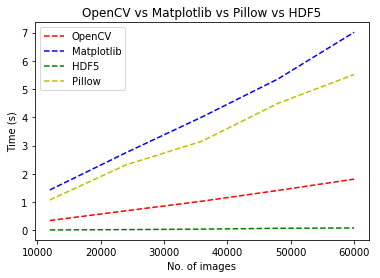

In [18]:
#Graph plotting
plt.plot(x_axis, y_axis_cv2,    'r--', label='OpenCV')
plt.plot(x_axis, y_axis_plt,    'b--', label='Matplotlib')
plt.plot(x_axis, y_axis_hdf5,   'g--', label='HDF5')
plt.plot(x_axis, y_axis_pillow, 'y--', label='Pillow')
plt.title("OpenCV vs Matplotlib vs Pillow vs HDF5")
plt.ylabel("Time (s)")
plt.xlabel("No. of images")
plt.legend()
plt.show()

In [19]:
time_hdf5

[0.015979079599992473,
 0.026796753500002525,
 0.043255645499993986,
 0.07329162959999849,
 0.08422466659999372]